In [40]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

In [41]:
from google.colab import files
import pandas as pd

# Prompt the user to upload a file
print("Please upload your CSV dataset.")
uploaded = files.upload()

# Get the uploaded file name
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
df = pd.read_csv(filename)

# Display the first few rows of the dataset
print("Dataset preview:")
print(df.head())


Please upload your CSV dataset.


Saving superstore.csv to superstore (1).csv
Dataset preview:
          Category         City        Country Customer.ID     Customer.Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数               Order.Date        Order.ID  ... Sales  \
0       0.0     US    1  2011-01-07 00:00:00.000  CA-2011-130813  ...    19   
1       0.0     US    1  2011-01-21 00:00:00.000  CA-2011-148614  ...    19   
2       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...    21   
3       0.0     US    1  2011-08-05 00:00:00.000  CA-2011-118962  ...   111   
4       0.0     US    1  2011-09-29 00:00:00.000  CA-2011-14696

In [42]:
# Read the uploaded CSV file
df = pd.read_csv(next(iter(uploaded)))

In [43]:
# Display the first few rows
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [44]:
# Basic information about the dataset
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales    

In [45]:
# Statistical summary of numerical columns
print("\nStatistical Summary:")
display(df.describe())



Statistical Summary:


,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [46]:
 # Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()

print(f"Number of duplicate rows: {duplicates}")

# Display duplicate rows if any exist
if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated()])


Number of duplicate rows: 0


In [47]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [48]:
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [49]:
# Handling missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Fill numeric columns with mean
df.fillna(df.mode().iloc[0], inplace=True)           # Fill categorical columns with mode



In [50]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [51]:
# Convert 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print("\nConverted 'Date' column to datetime format.")


In [52]:
# Verify the cleaned data
print("\nData after cleaning:")
display(df.head())


Data after cleaning:


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [53]:
# Sales trends over time
if 'Date' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    df.groupby('Date')['Sales'].sum().plot(kind='line', marker='o', color='blue')
    plt.title('Sales Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

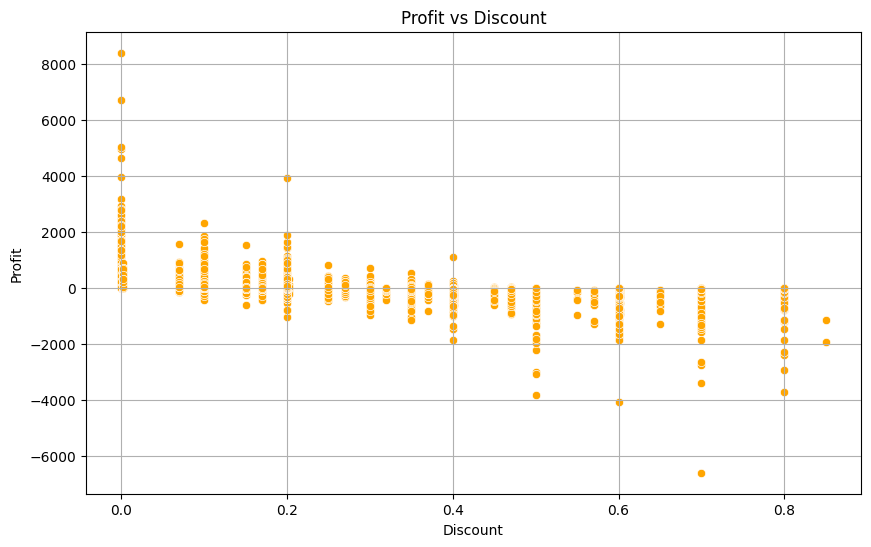

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Profit vs Discount
if 'Profit' in df.columns and 'Discount' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Discount', y='Profit', data=df, color='orange')
    plt.title("Profit vs Discount")
    plt.xlabel('Discount')
    plt.ylabel('Profit')
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Profit' and/or 'Discount' not found in the dataset.")


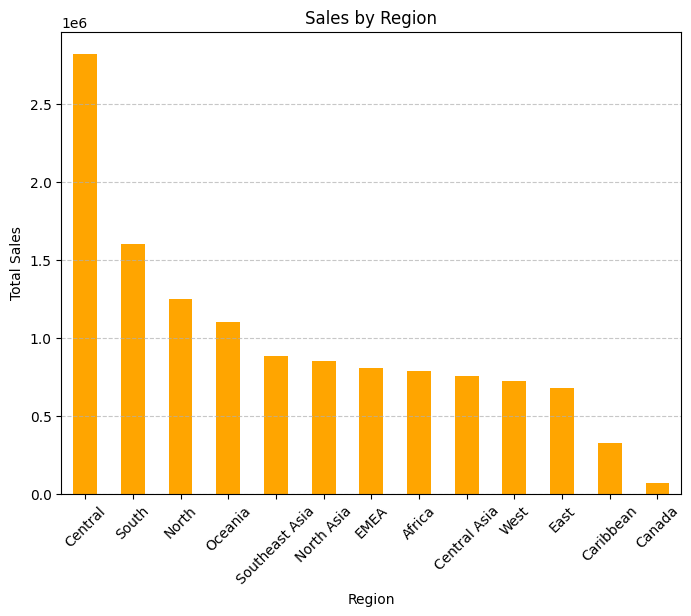

In [55]:
import matplotlib.pyplot as plt

# Sales distribution by region
if 'Region' in df.columns and 'Sales' in df.columns:
    plt.figure(figsize=(8, 6))

    # Grouping sales data by region
    region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

    # Plotting the bar chart
    region_sales.plot(kind='bar', color='orange')
    plt.title('Sales by Region')
    plt.ylabel('Total Sales')
    plt.xlabel('Region')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display the plot
    plt.show()
else:
    print("Columns 'Region' and/or 'Sales' not found in the dataset.")


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:15

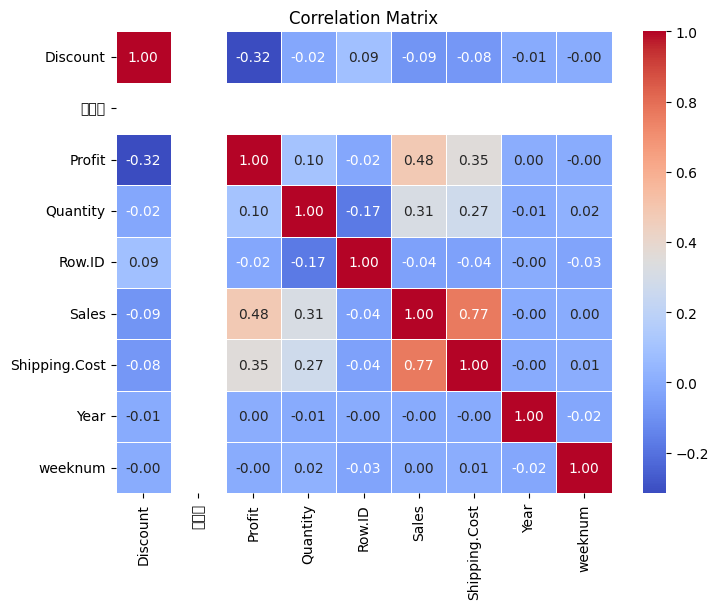

In [56]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [57]:
if all(col in df.columns for col in ['Profit', 'Discount', 'Sales']):
    # Select features and target
    X = df[['Profit', 'Discount']]
    y = df['Sales']

In [58]:
from sklearn.model_selection import train_test_split

# Ensure X (features) and y (target) are defined
if 'target_column_name' in df.columns:
    X = df.drop(columns=['target_column_name'])  # Replace with your target column name
    y = df['target_column_name']

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training set size:", X_train.shape)
    print("Test set size:", X_test.shape)
else:
    print("Target column not found in the dataset. Please check the column name.")


Target column not found in the dataset. Please check the column name.


In [59]:
# Ensure the model is trained before making predictions
if 'model' in locals() or 'model' in globals():
    y_pred = model.predict(X_test)
    print("Predictions made successfully.")
else:
    print("The model is not defined or trained. Please train the model before making predictions.")



The model is not defined or trained. Please train the model before making predictions.


In [60]:
from sklearn.metrics import mean_squared_error, r2_score

# Ensure required columns exist and the model has made predictions
if 'Profit' in df.columns and 'Discount' in df.columns and 'Sales' in df.columns:
    try:
        print("\nModel Performance Metrics:")
        print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
        print(f"R-squared Score: {r2_score(y_test, y_pred):.2f}")
    except NameError:
        print("\nError: Model predictions (y_pred) are not available. Please ensure the model is trained and predictions are made.")
else:
    print("\nNot enough columns for ML modeling. 'Profit', 'Discount', and 'Sales' are required.")



Model Performance Metrics:

Error: Model predictions (y_pred) are not available. Please ensure the model is trained and predictions are made.
